In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('aapl_all_csv.csv')
# Inspect the data

df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

#scaler1 = MinMaxScaler(feature_range=(0,1))
#scaled_data1 = scaler1.fit_transform(data_date)
# Create the training data set 
# Create the scaled training data set
train_data_date = data_date[0:int(training_data_date), :]

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.81304441, 0.81144125, 0.81464378, 0.81855352, 0.81982585,
       0.81926453, 0.81677626, 0.81428854, 0.81392572, 0.81428854,
       0.81215931, 0.81049595, 0.8085945 , 0.80895678, 0.80789053,
       0.80639801, 0.80504378, 0.80735741, 0.80824631, 0.80789053,
       0.80717953, 0.80966399, 0.80771319, 0.80824957, 0.80931256,
       0.81073403, 0.81073403, 0.81108927, 0.8103788 , 0.81144505,
       0.81091192, 0.81304441, 0.81375542, 0.8123334 , 0.8132223 ,
       0.81251129, 0.81499901, 0.81215605, 0.81002302, 0.81073403,
       0.81208826, 0.8103788 , 0.81128831, 0.8103788 , 0.8132223 ,
       0.81251129, 0.81073403, 0.81002302, 0.80966779, 0.80966779,
       0.80967159, 0.80860154, 0.80745015, 0.80522492, 0.80362556,
       0.80433657, 0.80504703, 0.80504703, 0.80575805, 0.80611328])]
[0.8091346667936978]

[array([0.81304441, 0.81144125, 0.81464378, 0.81855352, 0.81982585,
       0.81926453, 0.81677626, 0.81428854, 0.81392572, 0.81428854,
       0.81215931, 0.81049595, 0.808

In [3]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100



In [4]:
#cnn

Epoch 1/100
792/792 [==============================] - 8s 6ms/step - loss: 0.0018
Epoch 2/100
792/792 [==============================] - 4s 6ms/step - loss: 2.1977e-04
Epoch 3/100
792/792 [==============================] - 6s 7ms/step - loss: 1.9596e-04
Epoch 4/100
792/792 [==============================] - 6s 7ms/step - loss: 1.7775e-04
Epoch 5/100
792/792 [==============================] - 5s 6ms/step - loss: 1.6942e-04
Epoch 6/100
792/792 [==============================] - 7s 8ms/step - loss: 1.6085e-04
Epoch 7/100
792/792 [==============================] - 5s 7ms/step - loss: 1.3391e-04
Epoch 8/100
792/792 [==============================] - 5s 6ms/step - loss: 1.4651e-04
Epoch 9/100
792/792 [==============================] - 8s 10ms/step - loss: 1.3323e-04
Epoch 10/100
792/792 [==============================] - 5s 7ms/step - loss: 1.2455e-04
Epoch 11/100
792/792 [==============================] - 6s 8ms/step - loss: 1.2895e-04
Epoch 12/100
792/792 [==============================] -

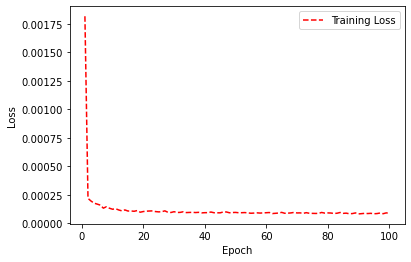

In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt

model2 = Sequential()
model2.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# Train the model
history = model2.fit(x_train, y_train, batch_size=16, epochs=100)

# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [6]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)

# Get the root mean squared error (RMSE)
rmse_2 = np.sqrt(np.mean(((predictions2 - y_test) ** 2)))
rmse_2

0.2004432371792602

In [7]:
train = data[:training_data_len]
valid_2 = data[training_data_len:]
valid_2['Predictions2'] = predictions2

mape(valid_2['Close'], valid_2['Predictions2'])

<ipython-input-7-f46f1df8d4ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions2'] = predictions2


0.09060910459374494

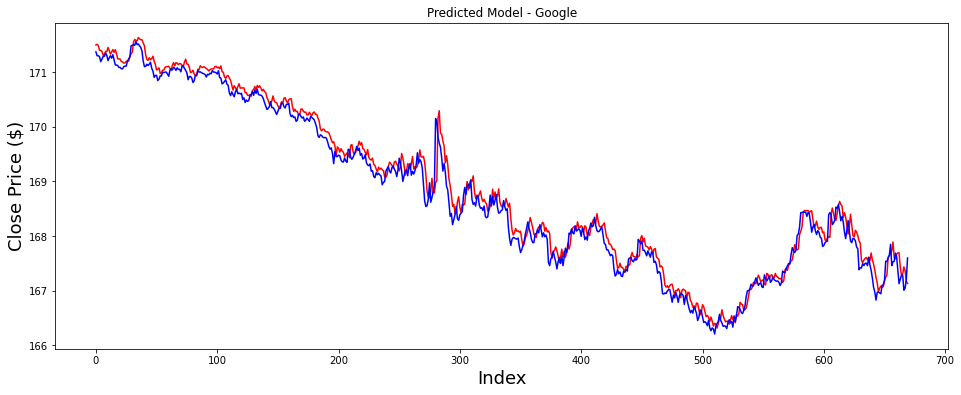

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Predicted Model - Google')
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
#plt.plot(train['Close'], 'b-', label = 'train')
plt.plot(predictions2,'r-', label = 'predict')
plt.plot(y_test,'b-', label = 'actual')
#plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()